# Import libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import nltk

# import data

In [2]:
df = pd.read_csv('result_topic_modelling.csv')
df.head()

title  year  \
0             #FIFArabCup: Will Qatar score as host?  2021   
1               30 days to FIFA World Cup Qatar 2022  2022   
2  AI at World Cup 2022 to check crowds, control ...  2022   
3  African journalists slam UAE ‘manipulation’ ov...  2021   
4  Algerian FA files complaint over World Cup qua...  2022   

                                                text     source  \
0  on tuesday, november 30 at 19:30gmt:\r\nit’s e...  aljazeera   
1  in picturesdoha, qatar – fifa world cup qatar ...  aljazeera   
2  qatar has set up a tech hub that uses ai to ke...  aljazeera   
3  federation of african journalists condemns wha...  aljazeera   
4  algerian football federation demands fifa orde...  aljazeera   

                     most_likely_topic_name  most_likely_topic_number  
0                          host arab region                        19  
1                    winter summer schedule                        18  
2           security detain police activist                        12  
3                          host arab region                        19  
4  group group_stage knockout_stage playoff                        14

In [3]:
df['most_likely_topic_name'].unique()

array(['host arab region', 'winter summer schedule',
       'security detain police activist',
       'group group_stage knockout_stage playoff', 'stadium build host',
       'worker wage amnesty', 'day thing today', 'fan ticket match beer',
       'woman gay armband lgbtq', 'power sense sportswashing',
       'club season champions_league',
       'bribe investigation charge warner',
       'sport sponsorship investment', 'russia gouvernment ukraine',
       'blatter bid vote ethic_commitee', 'squad player coach',
       'goal score minute', 'statement organisation letter',
       'people technology var',
       'journalism issue_surround_qatar treatment'], dtype=object)

In [4]:
#Group by Year and most_likely_topic_name, then count occurrences
counts = df.groupby(['year', 'most_likely_topic_name','source']).size().reset_index(name='Count')
source = ['aljazeera']

counts = counts.loc[counts['source'].isin(source)]
important_topics = ['woman gay armband lgbtq','worker wage amnesty','bribe investigation charge warner','journalism issue_surround_qatar treatment',
                    'fan ticket match beer','power sense sportswashing']
counts = counts.loc[counts['most_likely_topic_name'].isin(important_topics)]

# Create an interactive plot using Plotly
fig = px.line(counts, x='year', y='Count', color='most_likely_topic_name', title='aljazeera:Count of Topics per Year')
fig.show()

In [5]:
#Group by Year and most_likely_topic_name, then count occurrences
counts = df.groupby(['year', 'most_likely_topic_name','source']).size().reset_index(name='Count')
source = ['guardian']

counts = counts.loc[counts['source'].isin(source)]
important_topics = ['woman gay armband lgbtq','worker wage amnesty','bribe investigation charge warner','journalism issue_surround_qatar treatment',
                    'fan ticket match beer','power sense sportswashing']
counts = counts.loc[counts['most_likely_topic_name'].isin(important_topics)]

# Create an interactive plot using Plotly
fig = px.line(counts, x='year', y='Count', color='most_likely_topic_name', title='guardian:Count of Topics per Year')
fig.show()

In [6]:
def generate_distinct_colors(num_colors):
    """
    Generates a list of num_colors distinct and visually appealing colors using HSV color space.

    Args:
        num_colors (int): The number of colors to generate.

    Returns:
        list: A list of RGB color tuples.
    """

    colors = []
    for i in range(num_colors):
        h = i / (num_colors - 1)  # Hue value between 0 and 1
        s = 0.9  # Saturation (high for vivid colors)
        v = 0.8  # Value (controls brightness)
        rgb_color = colorsys.hsv_to_rgb(h, s, v)
        colors.append(rgb_color)
    return colors

# All topic Algaurdian vs aljazerra Relativ(Kuchen-diagramm)

## Aljazerra

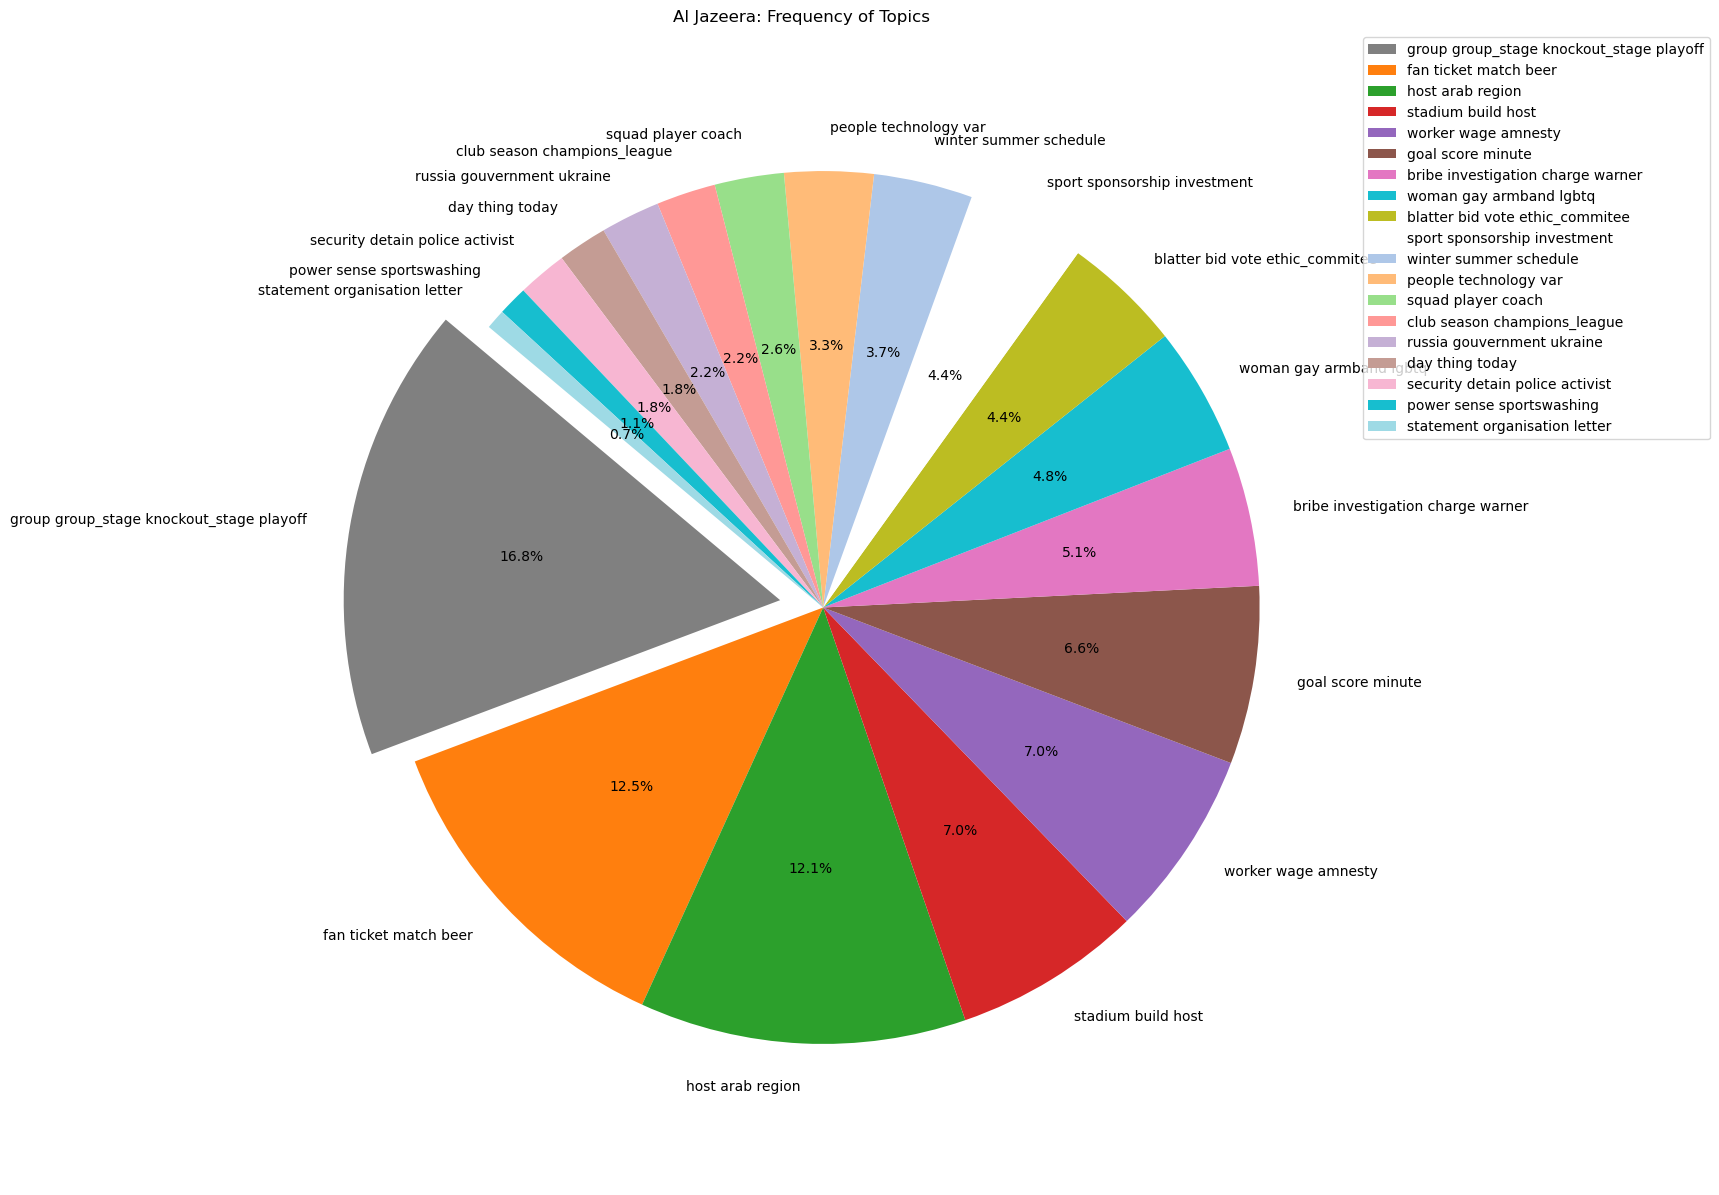

In [7]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' with columns 'source' and 'topic_name'
df_aljazerra = df.loc[df['source'] == 'aljazeera']
topic_counts = df_aljazerra['most_likely_topic_name'].value_counts()

# Customizing colors based on topic names
color_map = {
    'group stage knockout stage playoff': '#1f77b4',  # blue
    'fan ticket match beer': '#ff7f0e',  # orange
    'host arab region': '#2ca02c',  # green
    'stadium build host': '#d62728',  # red
    'worker wage amnesty': '#9467bd',  # purple
    'goal score minute': '#8c564b',  # brown
    'bribe investigation charge warner': '#e377c2',  # pink
    'woman gay armband lgbtq': '#17becf',  # cyan
    'blatter bid vote ethic_commitee': '#bcbd22',  # olive
    'sport sponsorship investment': '#FFFFFF',  # white
    'winter summer schedule': '#aec7e8',  # light blue
    'people technology var': '#ffbb78',  # light orange
    'squad player coach': '#98df8a',  # light green
    'club season champions_league': '#ff9896',  # light red
    'russia gouvernment ukraine': '#c5b0d5',  # light purple
    'day thing today': '#c49c94',  # light brown
    'security detain police activist': '#f7b6d2',  # light pink
    'power sense sportswashing': '#17becf',  # cyan (same as woman gay armband lgbtq)
    'statement organisation letter': '#9edae5'  # light cyan
}

# Get colors for each topic
colors = [color_map.get(topic, 'gray') for topic in topic_counts.index]

# Exploding the slice with the highest frequency
explode = [0.1 if i == 0 else 0 for i in range(len(topic_counts))]

# Plotting
plt.figure(figsize=(13, 15))
plt.pie(topic_counts, labels=topic_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Al Jazeera: Frequency of Topics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



## The guardian

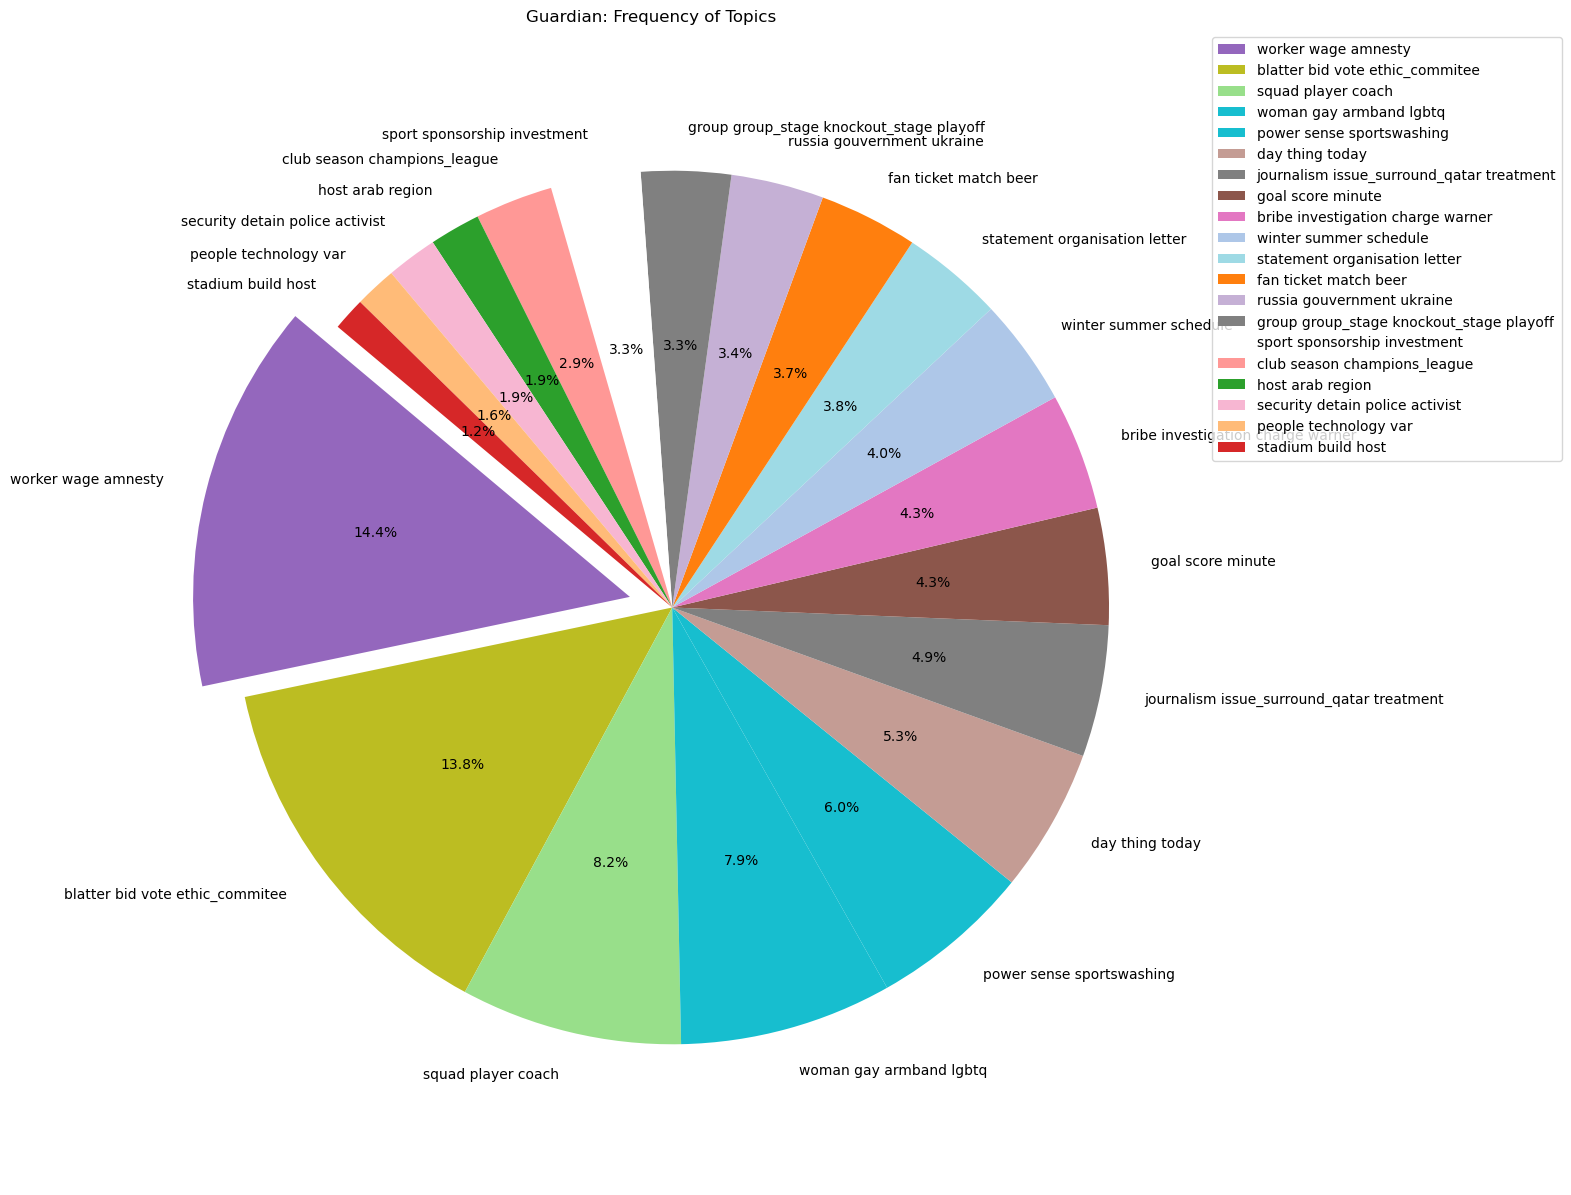

In [8]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' with columns 'source' and 'topic_name'
df_guardian = df.loc[df['source'] == 'guardian']
topic_counts = df_guardian['most_likely_topic_name'].value_counts()

# Customizing colors based on topic names
color_map = {
    'group stage knockout stage playoff': '#1f77b4',  # blue
    'fan ticket match beer': '#ff7f0e',  # orange
    'host arab region': '#2ca02c',  # green
    'stadium build host': '#d62728',  # red
    'worker wage amnesty': '#9467bd',  # purple
    'goal score minute': '#8c564b',  # brown
    'bribe investigation charge warner': '#e377c2',  # pink
    'woman gay armband lgbtq': '#17becf',  # cyan
    'blatter bid vote ethic_commitee': '#bcbd22',  # olive
    'sport sponsorship investment': '#FFFFFF',  # white
    'winter summer schedule': '#aec7e8',  # light blue
    'people technology var': '#ffbb78',  # light orange
    'squad player coach': '#98df8a',  # light green
    'club season champions_league': '#ff9896',  # light red
    'russia gouvernment ukraine': '#c5b0d5',  # light purple
    'day thing today': '#c49c94',  # light brown
    'security detain police activist': '#f7b6d2',  # light pink
    'power sense sportswashing': '#17becf',  # cyan (same as woman gay armband lgbtq)
    'statement organisation letter': '#9edae5'  # light cyan
}

# Get colors for each topic
colors = [color_map.get(topic, 'gray') for topic in topic_counts.index]

# Exploding the slice with the highest frequency
explode = [0.1 if i == 0 else 0 for i in range(len(topic_counts))]

# Plotting
plt.figure(figsize=(13, 15))
plt.pie(topic_counts, labels=topic_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Guardian: Frequency of Topics')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# All topic Algaurdian vs aljazerra absolut(Balken-diagramm)

## Aljazerra

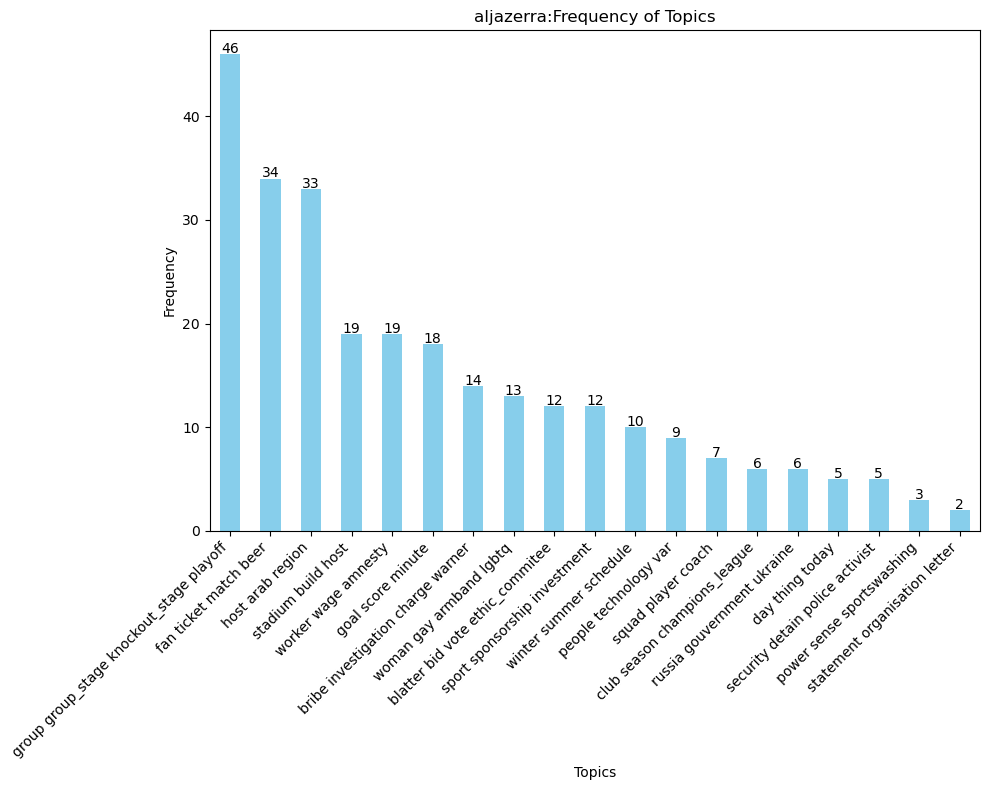

In [9]:
# Assuming your DataFrame is named 'df' with columns 'source' and 'topic_name'
topic_counts = df_aljazerra['most_likely_topic_name'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
topic_counts.plot(kind='bar', color='skyblue')
plt.title('aljazerra:Frequency of Topics')
plt.xlabel('Topics')
plt.ylabel('Frequency')

# Adding text labels
for i, count in enumerate(topic_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## The guardian

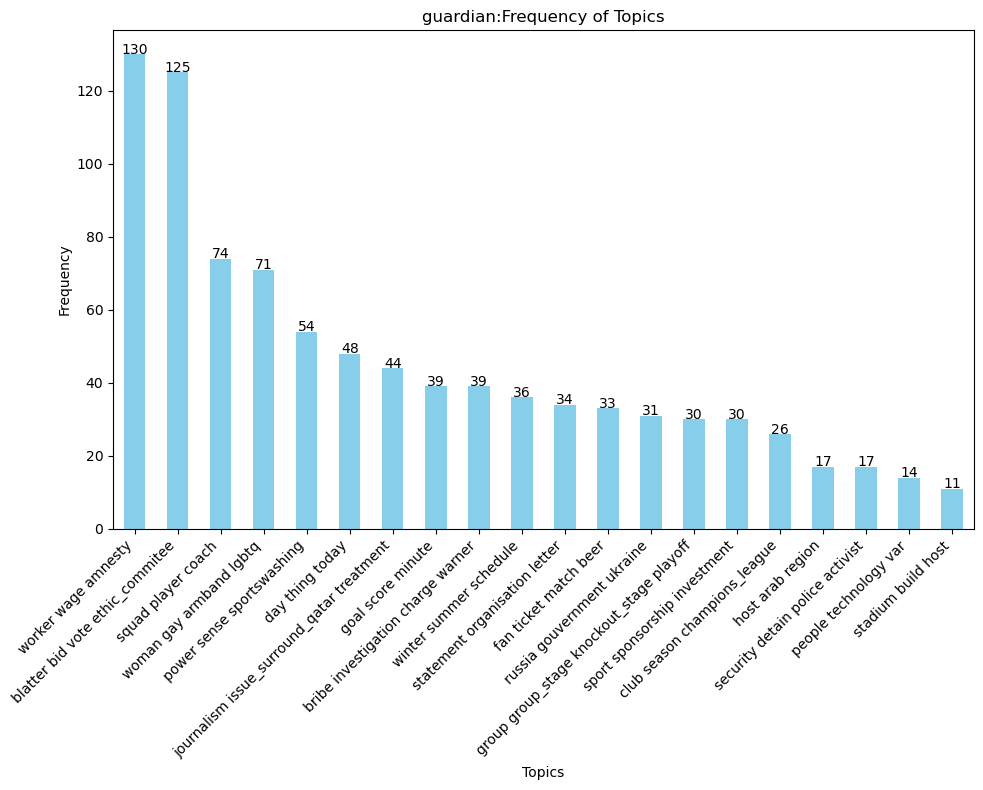

In [10]:
# Assuming your DataFrame is named 'df' with columns 'source' and 'topic_name'
topic_counts = df_guardian['most_likely_topic_name'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
topic_counts.plot(kind='bar', color='skyblue')
plt.title('guardian:Frequency of Topics')
plt.xlabel('Topics')
plt.ylabel('Frequency')

# Adding text labels
for i, count in enumerate(topic_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Sentiments pro Topic pro Jahr: Guardian vs Aljazeera


## Aljazerra

In [11]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming you have already defined 'df_aljazerra' DataFrame and 'sentiments' SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

aljazerra_unique_topics = df_aljazerra['most_likely_topic_name'].unique()

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['year', 'Positive_title', 'Negative_title', 'Neutral_title', 
                                'Positive_text', 'Negative_text', 'Neutral_text'])

for aljazerra_unique_topic in aljazerra_unique_topics:
    df_aljazerra_unique_topic_df = df_aljazerra[df_aljazerra['most_likely_topic_name'] == aljazerra_unique_topic]
    
    # Extract sentiment scores for title
    df_aljazerra_unique_topic_df["Positive_title"] = df_aljazerra_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["pos"])
    df_aljazerra_unique_topic_df["Negative_title"] = df_aljazerra_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["neg"])
    df_aljazerra_unique_topic_df["Neutral_title"] = df_aljazerra_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["neu"])
    
    # Extract sentiment scores for text
    df_aljazerra_unique_topic_df["Positive_text"] = df_aljazerra_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["pos"])
    df_aljazerra_unique_topic_df["Negative_text"] = df_aljazerra_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["neg"])
    df_aljazerra_unique_topic_df["Neutral_text"] = df_aljazerra_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["neu"])
    
    # Append to results DataFrame
    results = pd.concat([results, df_aljazerra_unique_topic_df], ignore_index=True)

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2852481143.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2852481143.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2852481143.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2852481143.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2852481143.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2852481143.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2852481143.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2852481143.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2852481143.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2852481143.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2852481143.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2852481143.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [62]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming you have already defined 'df_aljazerra' DataFrame and 'sentiments' SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

guardian_unique_topics = df_guardian['most_likely_topic_name'].unique()

# Create an empty DataFrame to store the results
results1 = pd.DataFrame(columns=['year', 'Positive_title', 'Negative_title', 'Neutral_title', 
                                'Positive_text', 'Negative_text', 'Neutral_text'])

for guardian_unique_topic in guardian_unique_topics:
    df_guardian_unique_topic_df = df_guardian[df_guardian['most_likely_topic_name'] == guardian_unique_topic]
    
    # Extract sentiment scores for title
    df_guardian_unique_topic_df["Positive_title"] = df_guardian_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["pos"])
    df_guardian_unique_topic_df["Negative_title"] = df_guardian_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["neg"])
    df_guardian_unique_topic_df["Neutral_title"] = df_guardian_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["neu"])
    
    # Extract sentiment scores for text
    df_guardian_unique_topic_df["Positive_text"] = df_guardian_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["pos"])
    df_guardian_unique_topic_df["Negative_text"] = df_guardian_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["neg"])
    df_guardian_unique_topic_df["Neutral_text"] = df_guardian_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["neu"])
    
    # Assign source
    df_guardian_unique_topic_df['source'] = 'The Guardian'
    
    # Append to results DataFrame
    results1 = pd.concat([results1, df_guardian_unique_topic_df], ignore_index=True)


/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_20755/2083965502.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

year  Positive_title  Negative_title  Neutral_title  Positive_text  \
0  2014           0.238           0.000          0.762          0.086   
1  2012           0.000           0.000          1.000          0.074   
2  2014           0.000           0.338          0.662          0.057   
3  2018           0.195           0.000          0.805          0.143   
4  2015           0.000           0.000          1.000          0.123   

   Negative_text  Neutral_text  \
0          0.051         0.863   
1          0.034         0.893   
2          0.083         0.860   
3          0.028         0.829   
4          0.055         0.822   

                                               title  \
0  Fifa ethics chief Michael Garcia calls for gre...   
1  Fifa to investigate new allegations over Qatar...   
2  Qatar World Cup sponsors warn Fifa of damage f...   
3  North America to host 2026 World Cup after win...   
4  Fifa is part of a wider culture of corruption ...   

                                                text        source  \
0   garcia has delivered his report on 2018 and 2...  The Guardian   
1  fifa has confirmed that the recently appointed...  The Guardian   
2  two more of fifa's headline \r\nworld cup\r\n ...  The Guardian   
3  in 2,920 days, give or take, the world cup wil...  The Guardian   
4  i\r\n would be very surprised indeed if briber...  The Guardian   

            most_likely_topic_name  most_likely_topic_number  
0  blatter bid vote ethic_commitee                      17.0  
1  blatter bid vote ethic_commitee                      17.0  
2  blatter bid vote ethic_commitee                      17.0  
3  blatter bid vote ethic_commitee                      17.0  
4  blatter bid vote ethic_commitee                      17.0

year  Positive_title  Negative_title  Neutral_title  Positive_text  \
0  2021           0.000           0.000          1.000          0.052   
1  2021           0.000           0.245          0.755          0.066   
2  2011           0.000           0.000          1.000          0.089   
3  2022           0.000           0.000          1.000          0.101   
4  2019           0.322           0.000          0.678          0.167   

   Negative_text  Neutral_text  \
0          0.000         0.948   
1          0.087         0.847   
2          0.019         0.892   
3          0.067         0.833   
4          0.050         0.783   

                                               title  \
0             #FIFArabCup: Will Qatar score as host?   
1  African journalists slam UAE ‘manipulation’ ov...   
2                    All eyes on Qatar for Asian Cup   
3  Analysis: Six key takeaways from the Qatar Wor...   
4  Arabian Gulf Cup: Football, blockade and an ‘h...   

                                                text     source  \
0  on tuesday, november 30 at 19:30gmt:\r\nit’s e...  aljazeera   
1  federation of african journalists condemns wha...  aljazeera   
2  the gulf state’s successful bid to host world ...  aljazeera   
3  from the end of the messi saga to the first ar...  aljazeera   
4  a look back at the regional tournament in qata...  aljazeera   

  most_likely_topic_name  most_likely_topic_number  
0       host arab region                      19.0  
1       host arab region                      19.0  
2       host arab region                      19.0  
3       host arab region                      19.0  
4       host arab region                      19.0

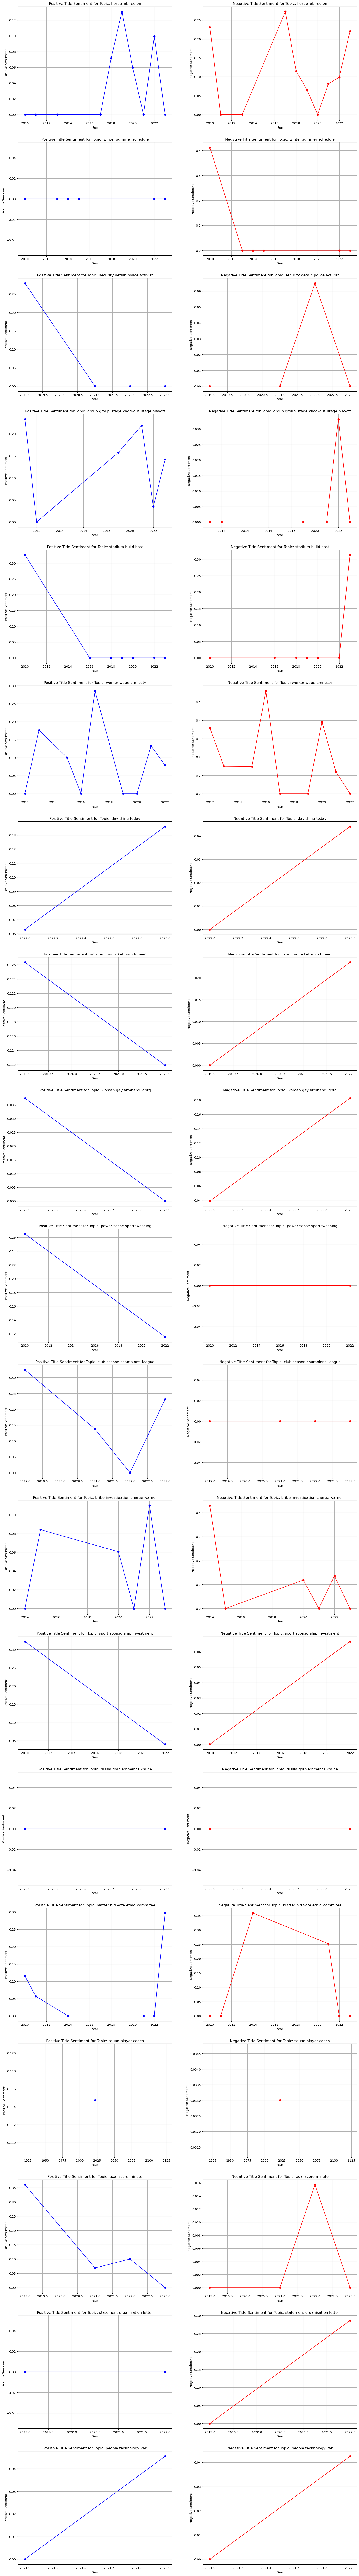

In [25]:
import matplotlib.pyplot as plt
import os

# Assuming you have already defined 'df_aljazerra' DataFrame and 'sentiments' SentimentIntensityAnalyzer

aljazerra_unique_topics = results['most_likely_topic_name'].unique()

fig, axes = plt.subplots(len(aljazerra_unique_topics), 2, figsize=(20, 8 * len(aljazerra_unique_topics)))

for idx, aljazerra_unique_topic in enumerate(aljazerra_unique_topics):

    df_aljazerra_unique_topic_df = results[results['most_likely_topic_name'] == aljazerra_unique_topic]
    
    # Positive titles
    ax = axes[idx, 0]
    df_aljazerra_unique_topic_df.groupby('year')['Positive_title'].mean().plot(ax=ax, marker='o', linestyle='-', color='b')
    ax.set_title(f'Positive Title Sentiment for Topic: {aljazerra_unique_topic}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Positive Sentiment')
    ax.grid(True)
    
    # Negative titles
    ax = axes[idx, 1]
    df_aljazerra_unique_topic_df.groupby('year')['Negative_title'].mean().plot(ax=ax, marker='o', linestyle='-', color='r')
    ax.set_title(f'Negative Title Sentiment for Topic: {aljazerra_unique_topic}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Negative Sentiment')
    ax.grid(True)

plt.tight_layout()
plt.show()
results.head()

year  Positive_title  Negative_title  Neutral_title  Positive_text  \
0  2021           0.000           0.000          1.000          0.052   
1  2021           0.000           0.245          0.755          0.066   
2  2011           0.000           0.000          1.000          0.089   
3  2022           0.000           0.000          1.000          0.101   
4  2019           0.322           0.000          0.678          0.167   

   Negative_text  Neutral_text  \
0          0.000         0.948   
1          0.087         0.847   
2          0.019         0.892   
3          0.067         0.833   
4          0.050         0.783   

                                               title  \
0             #FIFArabCup: Will Qatar score as host?   
1  African journalists slam UAE ‘manipulation’ ov...   
2                    All eyes on Qatar for Asian Cup   
3  Analysis: Six key takeaways from the Qatar Wor...   
4  Arabian Gulf Cup: Football, blockade and an ‘h...   

                                                text     source  \
0  on tuesday, november 30 at 19:30gmt:\r\nit’s e...  aljazeera   
1  federation of african journalists condemns wha...  aljazeera   
2  the gulf state’s successful bid to host world ...  aljazeera   
3  from the end of the messi saga to the first ar...  aljazeera   
4  a look back at the regional tournament in qata...  aljazeera   

  most_likely_topic_name  most_likely_topic_number  
0       host arab region                      19.0  
1       host arab region                      19.0  
2       host arab region                      19.0  
3       host arab region                      19.0  
4       host arab region                      19.0

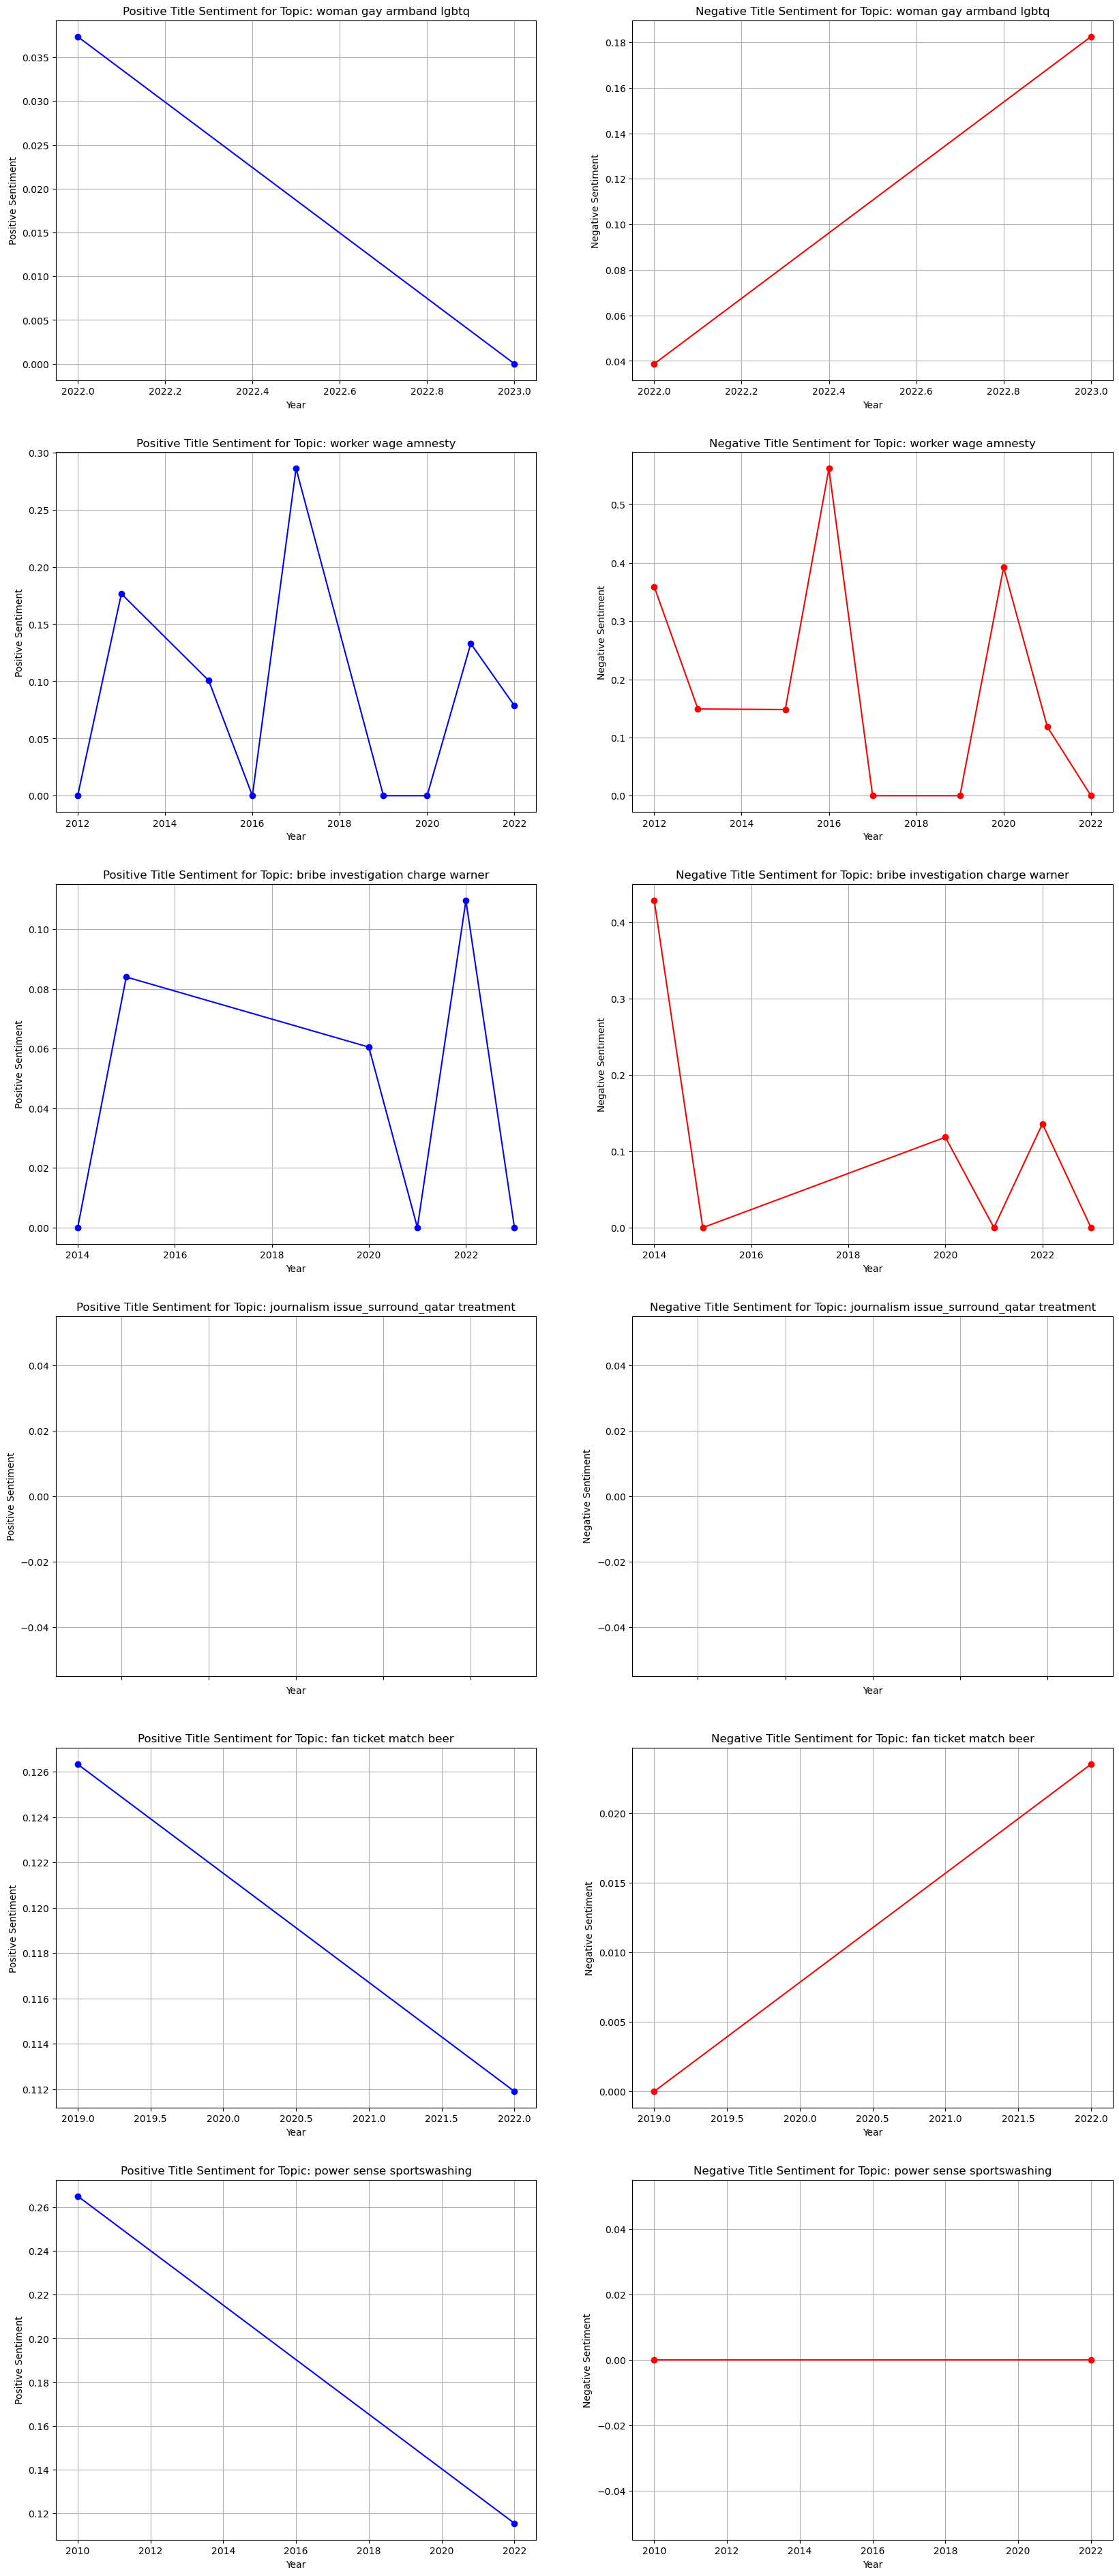

In [30]:
import matplotlib.pyplot as plt

# Assuming you have already defined 'df_aljazerra' DataFrame and 'sentiments' SentimentIntensityAnalyzer

aljazerra_unique_topics = results['most_likely_topic_name'].unique()
important_topics = ['woman gay armband lgbtq','worker wage amnesty','bribe investigation charge warner','journalism issue_surround_qatar treatment',
                    'fan ticket match beer','power sense sportswashing']
fig, axes = plt.subplots(len(important_topics), 2, figsize=(20, 8 * len(important_topics)))

for idx, aljazerra_unique_topic in enumerate(important_topics):

    df_aljazerra_unique_topic_df = results[results['most_likely_topic_name'] == aljazerra_unique_topic]
    
    # Positive titles
    ax = axes[idx, 0]
    df_aljazerra_unique_topic_df.groupby('year')['Positive_title'].mean().plot(ax=ax, marker='o', linestyle='-', color='b')
    ax.set_title(f'Positive Title Sentiment for Topic: {aljazerra_unique_topic}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Positive Sentiment')
    ax.grid(True)
    
    # Negative titles
    ax = axes[idx, 1]
    df_aljazerra_unique_topic_df.groupby('year')['Negative_title'].mean().plot(ax=ax, marker='o', linestyle='-', color='r')
    ax.set_title(f'Negative Title Sentiment for Topic: {aljazerra_unique_topic}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Negative Sentiment')
    ax.grid(True)

#plt.tight_layout()
#plt.show()
results.head()

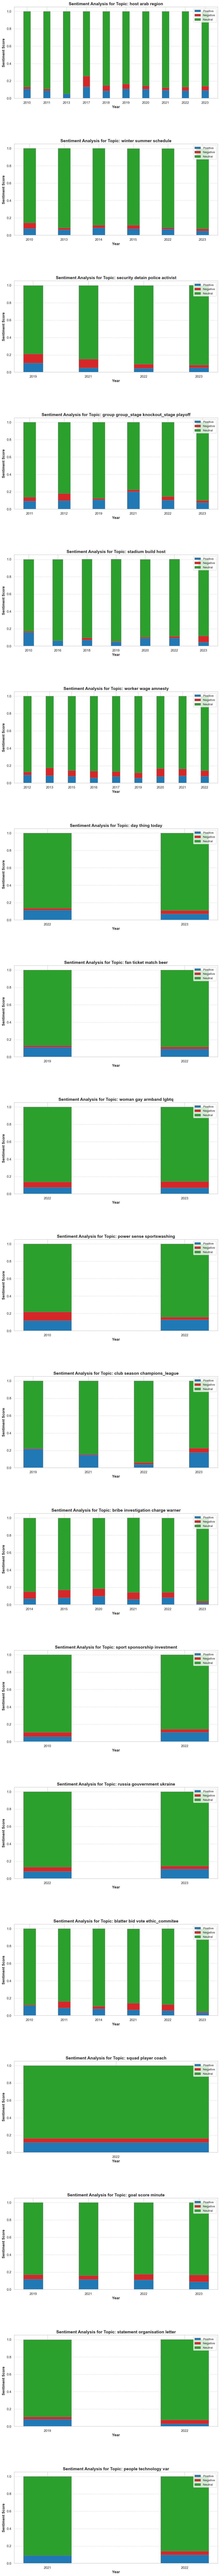

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors for positive, negative, and neutral sentiments
colors = ['#1f77b4', '#d62728', '#2ca02c']

aljazerra_unique_topics = results['most_likely_topic_name'].unique()
#important_topics = ['woman gay armband lgbtq','worker wage amnesty','bribe investigation charge warner','journalism issue_surround_qatar treatment',
 #                   'fan ticket match beer','power sense sportswashing']
fig, axes = plt.subplots(len(aljazerra_unique_topics), 1, figsize=(12, 8 * len(aljazerra_unique_topics)))

for idx, aljazerra_unique_topic in enumerate(aljazerra_unique_topics):

    df_aljazerra_unique_topic_df = results[results['most_likely_topic_name'] == aljazerra_unique_topic]
    
    # Check if DataFrame is empty
    if not df_aljazerra_unique_topic_df.empty:
        years = df_aljazerra_unique_topic_df['year'].unique()
        num_years = len(years)
        
        # Sort years
        years = np.sort(years)
        
        # Set the width of the bars
        bar_width = 0.35
        
        # Set the positions of the bars on the x-axis
        r = np.arange(num_years)

        # Plotting positive sentiment
        ax = axes[idx]
        ax.bar(r, df_aljazerra_unique_topic_df.groupby('year')['Positive_text'].mean().loc[years], color=colors[0], width=bar_width, edgecolor='grey', label='Positive')
        # Plotting negative sentiment
        ax.bar(r, df_aljazerra_unique_topic_df.groupby('year')['Negative_text'].mean().loc[years], bottom=df_aljazerra_unique_topic_df.groupby('year')['Positive_text'].mean().loc[years], color=colors[1], width=bar_width, edgecolor='grey', label='Negative')
        # Plotting neutral sentiment
        ax.bar(r, df_aljazerra_unique_topic_df.groupby('year')['Neutral_text'].mean().loc[years], bottom=df_aljazerra_unique_topic_df.groupby('year')['Positive_text'].mean().loc[years] + df_aljazerra_unique_topic_df.groupby('year')['Negative_text'].mean().loc[years], color=colors[2], width=bar_width, edgecolor='grey', label='Neutral')

        # Adding labels and title
        ax.set_xlabel('Year', fontweight='bold', fontsize=12)
        ax.set_ylabel('Sentiment Score', fontweight='bold', fontsize=12)
        ax.set_title(f'Sentiment Analysis for Topic: {aljazerra_unique_topic}', fontweight='bold', fontsize=14)
        ax.set_xticks(r)
        ax.set_xticklabels(years)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.legend(loc='upper right', fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()


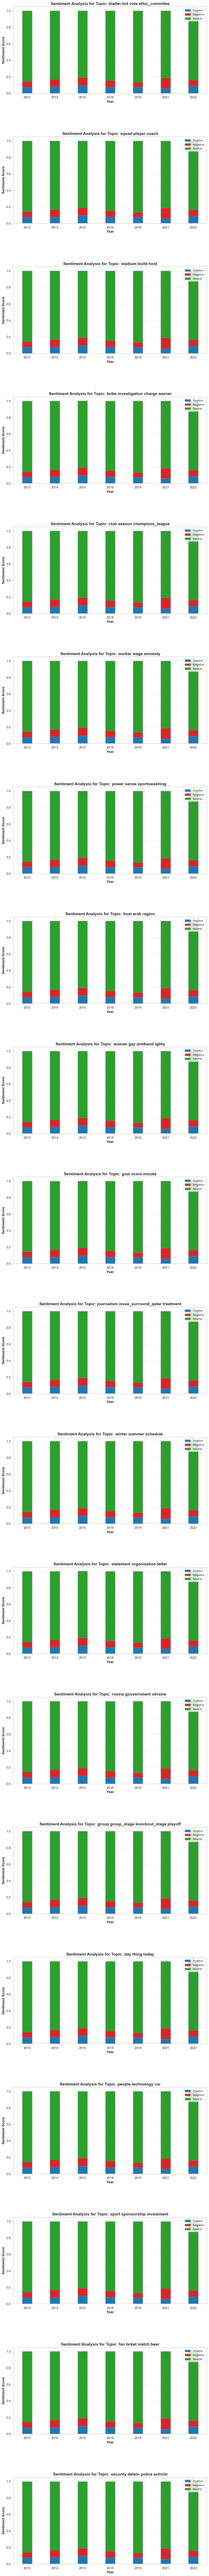

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors for positive, negative, and neutral sentiments
colors = ['#1f77b4', '#d62728', '#2ca02c']

guardian_unique_topics = results1['most_likely_topic_name'].unique()
#important_topics = ['woman gay armband lgbtq','worker wage amnesty','bribe investigation charge warner','journalism issue_surround_qatar treatment',
 #                   'fan ticket match beer','power sense sportswashing']
fig, axes = plt.subplots(len(guardian_unique_topics), 1, figsize=(12, 8 * len(guardian_unique_topics)))

for idx, aljazerra_unique_topic in enumerate(guardian_unique_topics):

    df_guardian_unique_topic_df = results1[results1['most_likely_topic_name'] == guardian_unique_topic]
    
    # Check if DataFrame is empty
    if not df_guardian_unique_topic_df.empty:
        years = df_guardian_unique_topic_df['year'].unique()
        num_years = len(years)
        
        # Sort years
        years = np.sort(years)
        
        # Set the width of the bars
        bar_width = 0.35
        
        # Set the positions of the bars on the x-axis
        r = np.arange(num_years)

        # Plotting positive sentiment
        ax = axes[idx]
        ax.bar(r, df_guardian_unique_topic_df.groupby('year')['Positive_text'].mean().loc[years], color=colors[0], width=bar_width, edgecolor='grey', label='Positive')
        # Plotting negative sentiment
        ax.bar(r, df_guardian_unique_topic_df.groupby('year')['Negative_text'].mean().loc[years], bottom=df_guardian_unique_topic_df.groupby('year')['Positive_text'].mean().loc[years], color=colors[1], width=bar_width, edgecolor='grey', label='Negative')
        # Plotting neutral sentiment
        ax.bar(r, df_guardian_unique_topic_df.groupby('year')['Neutral_text'].mean().loc[years], bottom=df_guardian_unique_topic_df.groupby('year')['Positive_text'].mean().loc[years] + df_guardian_unique_topic_df.groupby('year')['Negative_text'].mean().loc[years], color=colors[2], width=bar_width, edgecolor='grey', label='Neutral')

        # Adding labels and title
        ax.set_xlabel('Year', fontweight='bold', fontsize=12)
        ax.set_ylabel('Sentiment Score', fontweight='bold', fontsize=12)
        ax.set_title(f'Sentiment Analysis for Topic: {aljazerra_unique_topic}', fontweight='bold', fontsize=14)
        ax.set_xticks(r)
        ax.set_xticklabels(years)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.legend(loc='upper right', fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Display the plot
plt.show()



# Einzeln auf ausgewählte Themen:


### Absolute Häufigkeit über die Zeit

### Aljazeera

In [14]:
# Group by Year and most_likely_topic_name, then count occurrences
counts = df_aljazerra.groupby(['year', 'most_likely_topic_name']).size().reset_index(name='Count')

important_topics = ['woman gay armband lgbtq','worker wage amnesty','bribe investigation charge warner','journalism issue_surround_qatar treatment',
                    'fan ticket match beer','power sense sportswashing']
counts = counts.loc[counts['most_likely_topic_name'].isin(important_topics)]

# Create an interactive plot using Plotly
fig = px.line(counts, x='year', y='Count', color='most_likely_topic_name', title='Count of Topics per Year')
fig.show()


### The guardian

In [15]:
# Group by Year and most_likely_topic_name, then count occurrences
counts = df_guardian.groupby(['year', 'most_likely_topic_name']).size().reset_index(name='Count')

important_topics = ['woman gay armband lgbtq','worker wage amnesty','bribe investigation charge warner','journalism issue_surround_qatar treatment',
                    'fan ticket match beer','power sense sportswashing']
counts = counts.loc[counts['most_likely_topic_name'].isin(important_topics)]

# Create an interactive plot using Plotly
fig = px.line(counts, x='year', y='Count', color='most_likely_topic_name', title='Count of Topics per Year')
fig.show()


### Sentiment Pro Topic

#### Aljazeera

In [69]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming you have already defined 'df_aljazerra' DataFrame and 'sentiments' SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

important_topics = ['woman gay armband lgbtq','worker wage amnesty','bribe investigation charge warner','journalism issue_surround_qatar treatment',
                    'fan ticket match beer','power sense sportswashing']

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['year', 'Positive_title', 'Negative_title', 'Neutral_title', 
                                'Positive_text', 'Negative_text', 'Neutral_text'])

for aljazerra_unique_topic in important_topics:
    df_aljazerra_unique_topic_df = df_aljazerra[df_aljazerra['most_likely_topic_name'] == aljazerra_unique_topic]
    
    # Extract sentiment scores for title
    df_aljazerra_unique_topic_df["Positive_title"] = df_aljazerra_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["pos"])
    df_aljazerra_unique_topic_df["Negative_title"] = df_aljazerra_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["neg"])
    df_aljazerra_unique_topic_df["Neutral_title"] = df_aljazerra_unique_topic_df["title"].apply(lambda x: sentiments.polarity_scores(x)["neu"])
    
    # Extract sentiment scores for text
    df_aljazerra_unique_topic_df["Positive_text"] = df_aljazerra_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["pos"])
    df_aljazerra_unique_topic_df["Negative_text"] = df_aljazerra_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["neg"])
    df_aljazerra_unique_topic_df["Neutral_text"] = df_aljazerra_unique_topic_df["text"].apply(lambda x: sentiments.polarity_scores(x)["neu"])
    
    # Append to results DataFrame
    results = pd.concat([results, df_aljazerra_unique_topic_df], ignore_index=True)




/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_2472/2767487708.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_2472/2767487708.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_2472/2767487708.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_2472/2767487708.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_2472/2767487708.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zp/2bfgs58d5bbc39rk7m7l_wz80000gn/T/ipykernel_2472/2767487708.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [18]:
import matplotlib.pyplot as plt

aljazerra_unique_topic_list = []
aljazerra_unique_topic_title_pos_list = []
aljazerra_unique_topic_title_neg_list = []
aljazerra_unique_topic_text_pos_list = []
aljazerra_unique_topic_text_neg_list = []

aljazerra_unique_topics = results['most_likely_topic_name'].unique()

for idx, aljazerra_unique_topic in enumerate(aljazerra_unique_topics):
    aljazerra_unique_topic_list.append(aljazerra_unique_topic)
    df_aljazerra_unique_topic_df = results[results['most_likely_topic_name'] == aljazerra_unique_topic]
    aljazerra_unique_topic_title_pos_list.append(df_aljazerra_unique_topic_df['Positive_title'].mean())
    aljazerra_unique_topic_title_neg_list.append(df_aljazerra_unique_topic_df['Negative_title'].mean())
    aljazerra_unique_topic_text_pos_list.append(df_aljazerra_unique_topic_df['Positive_text'].mean())
    aljazerra_unique_topic_text_neg_list.append(df_aljazerra_unique_topic_df['Negative_text'].mean())
    
# Create DataFrame
df_aljazerra_sentiment_pro_topic = pd.DataFrame({
    'topic': aljazerra_unique_topic_list,
    'title_pos_mean': aljazerra_unique_topic_title_pos_list,
    'title_neg_mean': aljazerra_unique_topic_title_neg_list,
    'text_pos_mean': aljazerra_unique_topic_text_pos_list,
    'text_neg_mean': aljazerra_unique_topic_text_neg_list
})
 
print (df_aljazerra_sentiment_pro_topic)

                                       topic  title_pos_mean  title_neg_mean  \
0                           host arab region        0.071606        0.097182   
1                     winter summer schedule        0.000000        0.041200   
2            security detain police activist        0.055800        0.026000   
3   group group_stage knockout_stage playoff        0.060913        0.025261   
4                         stadium build host        0.034316        0.032947   
5                        worker wage amnesty        0.094526        0.157000   
6                            day thing today        0.092200        0.017600   
7                      fan ticket match beer        0.113176        0.021441   
8                    woman gay armband lgbtq        0.031615        0.060846   
9                  power sense sportswashing        0.165333        0.000000   
10              club season champions_league        0.192500        0.000000   
11         bribe investigation charge wa